#Encoding

In [1]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn                 as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from datetime import datetime
import missingno as msng
import calendar
import time
from datetime import date, timedelta, datetime as dt
import re

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [3]:
df = "/content/gdrive/MyDrive/Ejercicios ciencia de datos/Prediccion_bancarrota_empresas.csv"

#EDA

In [4]:
df = pd.read_csv(df)

In [5]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [6]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

#Ingeniería de atributos

##Dimensiones:

*  No

## Medidas:

*  Todas las variables

## Se analizan con box blots la distribución de los datos por variable

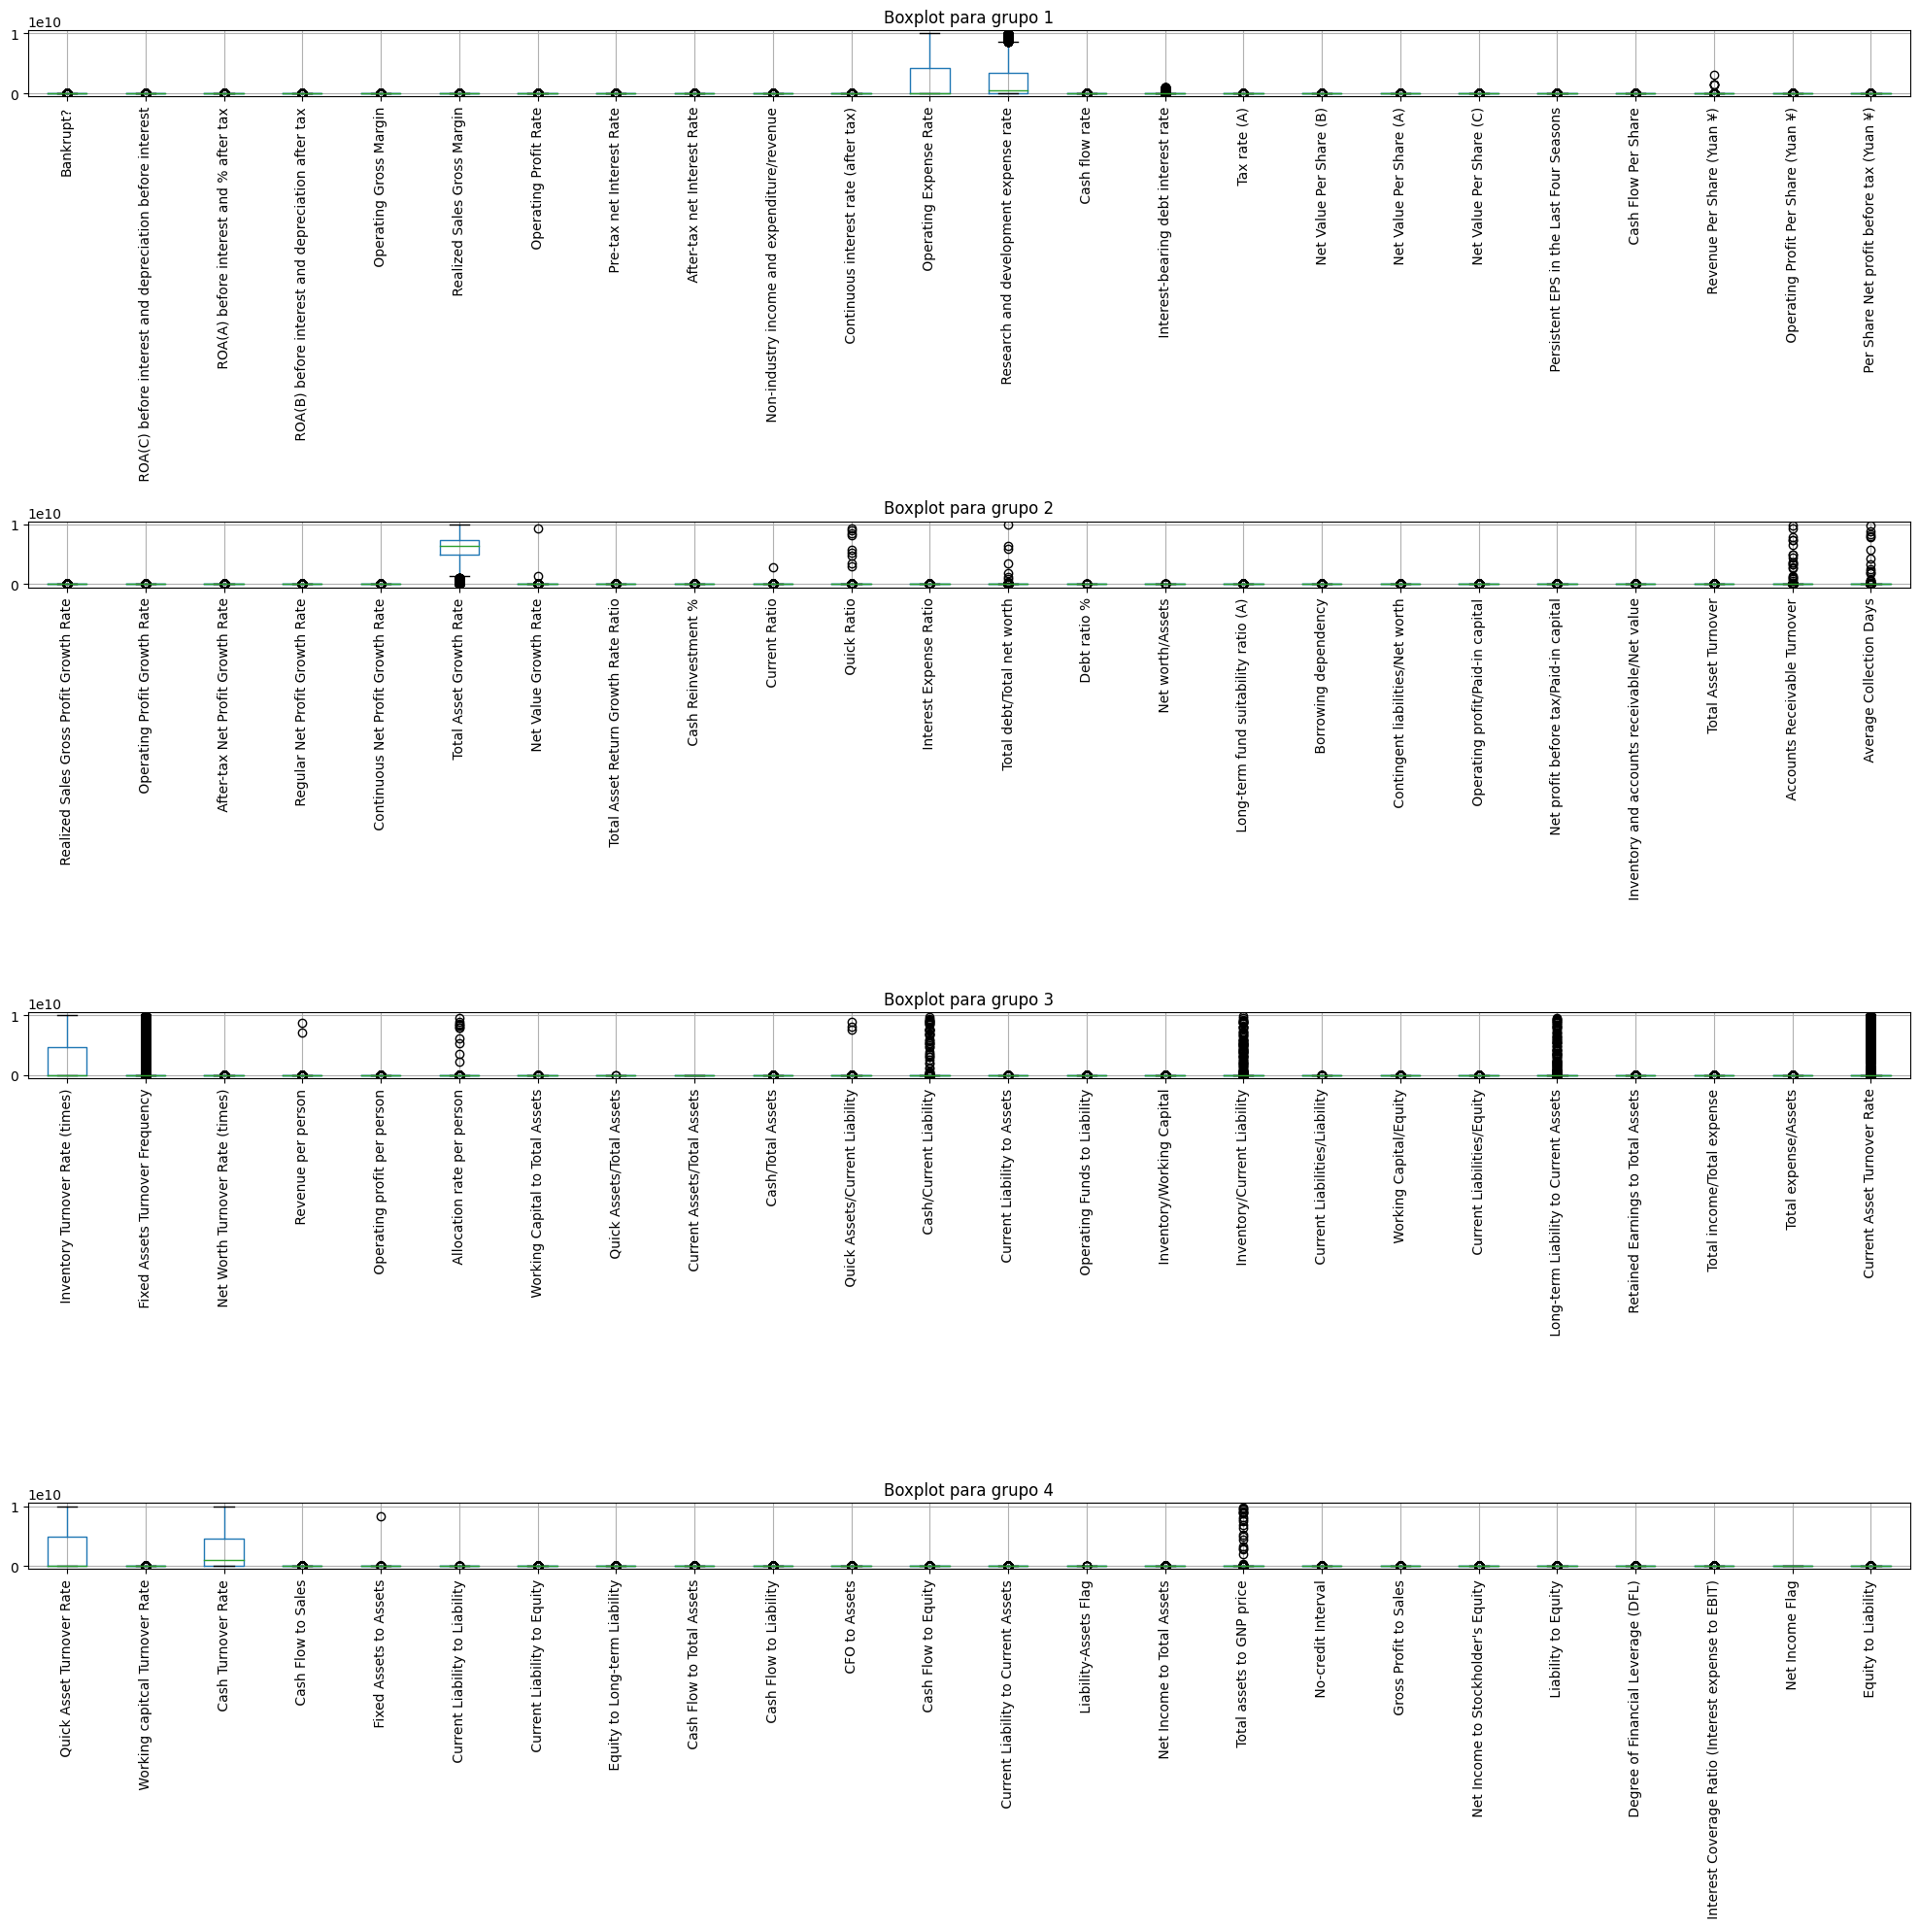

In [11]:
import matplotlib.pyplot as plt

# Dividir las columnas en 4 grupos
num_cols = len(df.columns)
cols_per_subplot = num_cols // 4 + (num_cols % 4 > 0)  # Redondear hacia arriba

# Crear subplots para cada grupo de columnas
fig, axs = plt.subplots(4, figsize=(20, 20))  # 4 filas de subplots

# Iterar sobre los grupos de columnas y crear un boxplot para cada grupo
for i in range(4):
    start_idx = i * cols_per_subplot
    end_idx = min((i + 1) * cols_per_subplot, num_cols)
    cols_to_plot = df.columns[start_idx:end_idx]
    df[cols_to_plot].boxplot(ax=axs[i])
    axs[i].set_title(f'Boxplot para grupo {i+1}')
    axs[i].set_xticklabels(cols_to_plot, rotation=90)  # Rotar nombres de columnas para mejor visualización

plt.tight_layout()  # Ajustar el diseño de los subplots
plt.show()


## Se analiza con Heatmap las correlaciones entre las variables

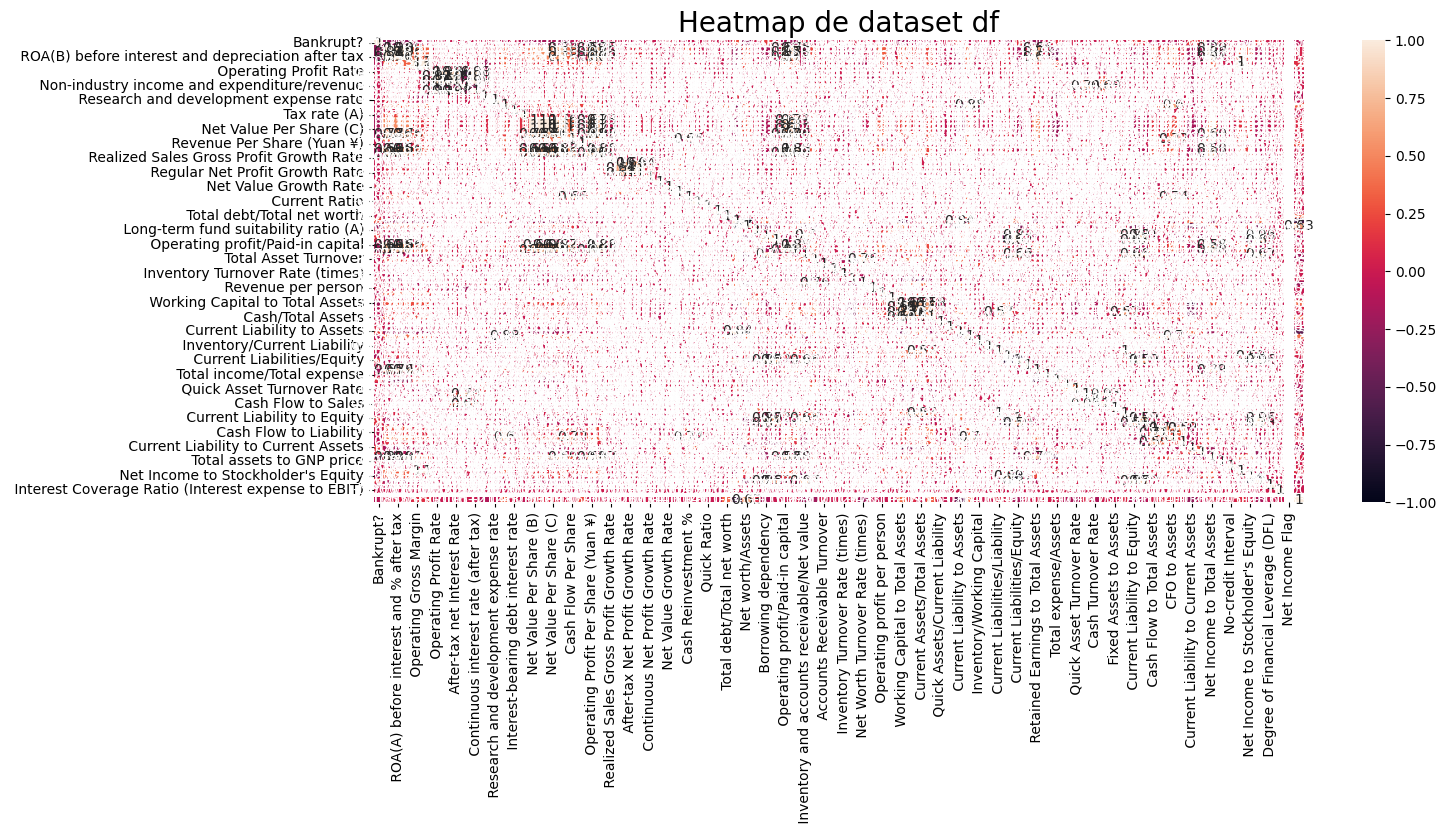

In [10]:
plt.rcParams['figure.figsize'] = (15, 6)

sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap de dataset df', fontsize = 20)
plt.show()

In [16]:
# Calcular la matriz de correlación de la variable " Bankrupt?"
correlaciones = df.corr()

# Obtener las correlaciones de la variable " Bankrupt?" con el resto de las variables
correlaciones_Bankrupt = correlaciones['Bankrupt?']

# Mostrar las correlaciones
print(correlaciones_Bankrupt)

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
                                                              ...   
 Liability to Equity                                        0.166812
 Degree of Financial Leverage (DFL)                         0.010508
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005509
 Net Income Flag                                                 NaN
 Equity to Liability                                       -0.083048
Name: Bankrupt?, Length: 96, dtype: float64


####Se evidencia que no hay correlaciones con la variable Bankrupt?

In [18]:
# Calcular la matriz de correlación de la variable " Net Income Flag?"
correlaciones = df.corr()

# Obtener las correlaciones de la variable " Net Income Flag?" con el resto de las variables
correlaciones_Income = correlaciones[' Net Income Flag']

# Mostrar las correlaciones
print(correlaciones_Income)

Bankrupt?                                                  NaN
 ROA(C) before interest and depreciation before interest   NaN
 ROA(A) before interest and % after tax                    NaN
 ROA(B) before interest and depreciation after tax         NaN
 Operating Gross Margin                                    NaN
                                                            ..
 Liability to Equity                                       NaN
 Degree of Financial Leverage (DFL)                        NaN
 Interest Coverage Ratio (Interest expense to EBIT)        NaN
 Net Income Flag                                           NaN
 Equity to Liability                                       NaN
Name:  Net Income Flag, Length: 96, dtype: float64


####Se evidencia que no hay correlaciones con la variable 'Net Income Flag'

#Machine Learning, Árbol de Decisión

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

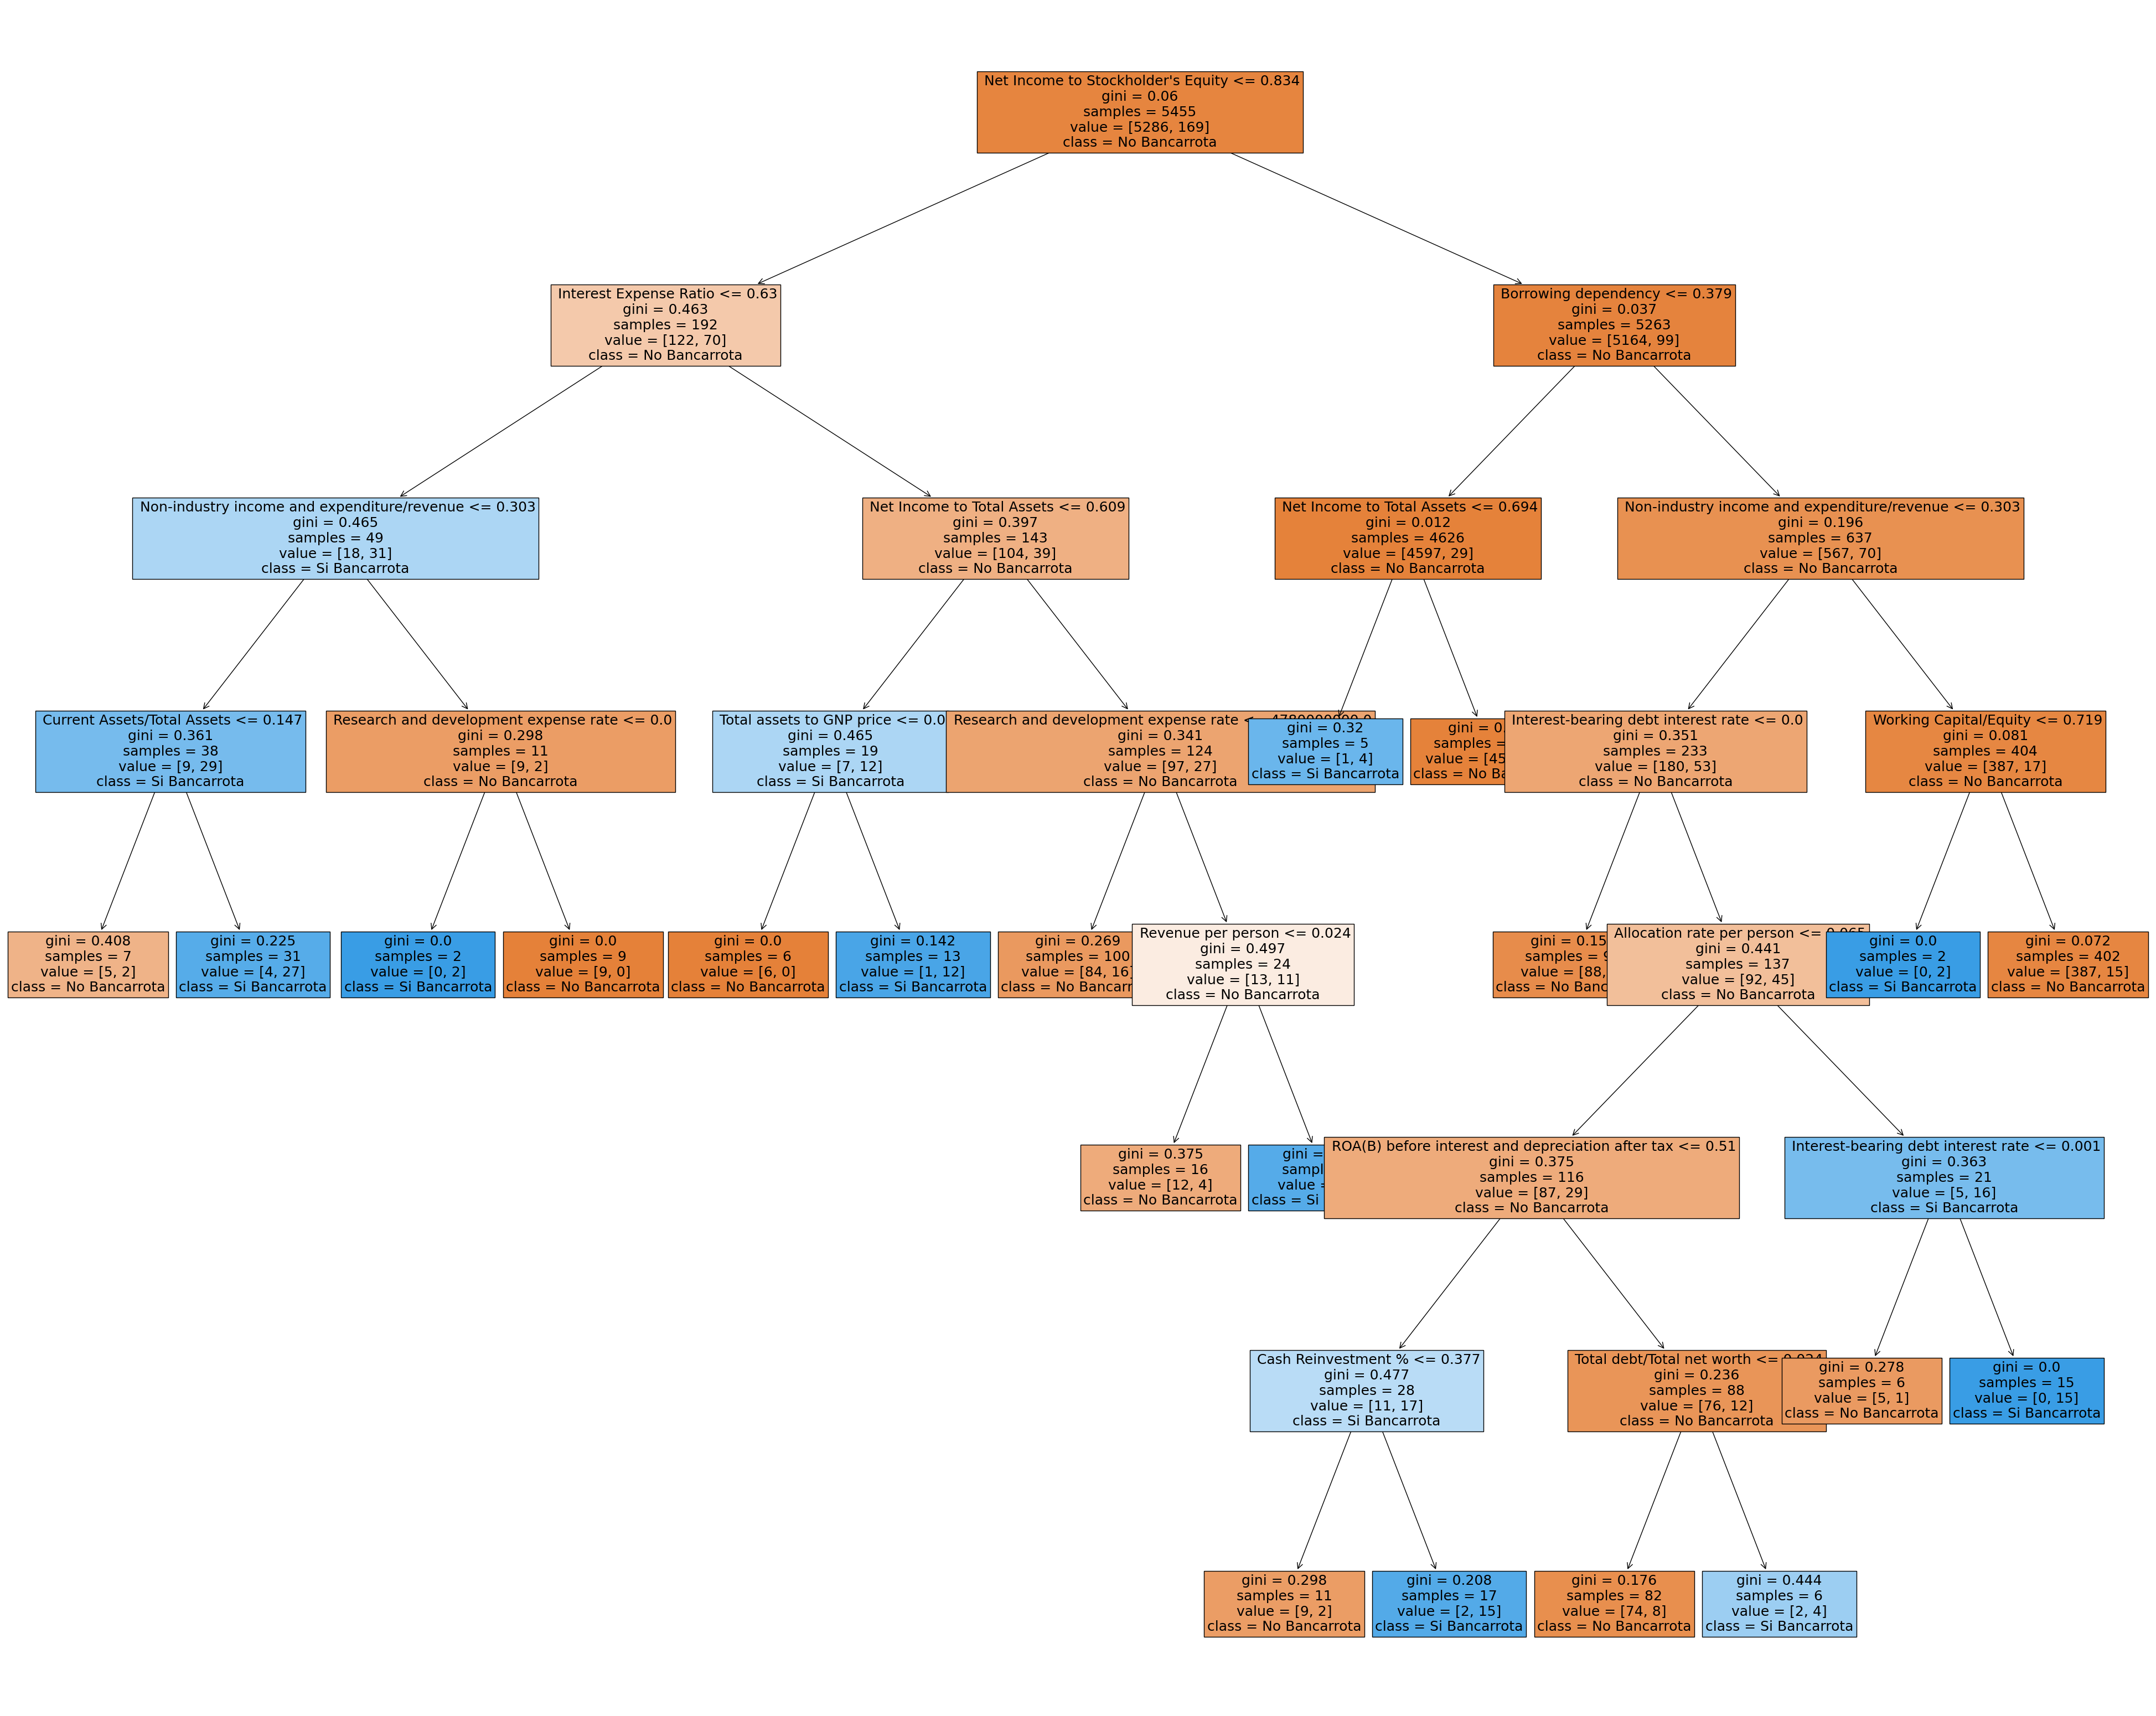

Rendimiento del árbol de decisión con 20 nodos: 0.96


In [26]:
#Paso 1: Dividimos el dataset en entrenamiento y prueba.

X = df.drop('Bankrupt?', axis=1)

y = df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 2 = Crear el árbol de decisión con nodos con 20
model = DecisionTreeClassifier(max_leaf_nodes= 20)

#Paso 3 = Ajuste del modelo
model.fit(X_train, y_train)

#Paso 4: Visualizar árbol de decisión
plt.figure(figsize=(50, 40))
plot_tree(model, feature_names=X.columns, class_names=['No Bancarrota', 'Si Bancarrota'], filled=True, fontsize=18)
plt.show()

#Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Paso 6: Evaluar el rendimiento del árbol de decisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del árbol de decisión con 20 nodos: {accuracy:.2f}')

#### Se interpreta el árbol de decisión de la siguiente manera: extiste una probabilidad del 96% para que una empresa entre en bancarrota si se cumplen las siguientes condiciones

*  Si el Net Income to Stockholder's Equity es <=0.834, el Interest Expense Ratio <=0.63, el Non-industry income and expenditure/revenue' <=0.303, y el Current Assets/Total Assets >= 0.147 Si  hay bancarrota
*  Si el Net Income to Stockholder's Equity es <=0.834, el Interest Expense Ratio <=0.63, el Non-industry income and expenditure/revenue' >=0.303 y el Research and development expense rate <=0 Si hay bancarrota
*  Si el Net Income to Stockholder's Equity es <=0.834, el Interest Expense Ratio >=0.63, el Net Income to Total Assets <=0.609, y el Total assets to GNP price >=0 Si hay bancarrota
*  Si el Net Income to Stockholder's Equity es <=0.834, el Interest Expense Ratio >=0.63, el Net Income to Total Assets >=0.609, el Research and development expense rate >=0.17, y el Revenue per person >=0.024 Si hay bancarrota
*  Si el Net Income to Stockholder's Equity es >=0.834, el Borrowing dependency <=0.379 y el Net Income to Total Assets' <=0.694 Si hay bancarrota
*  Si el Net Income to Stockholder's Equity es >=0.834, el Borrowing dependency >=0.379, el Non-industry income and expenditure/revenue <=0.303, el Interest-bearing debt interest rate >=0, el Allocation rate per person <=0.055, el ROA(B) before interest and depreciation after tax <=0.51, y el Cash reinvestment >=0.377 Si hay bancarrota
*  Si el Net Income to Stockholder's Equity es >=0.834, el Borrowing dependency >=0.379, el Non-industry income and expenditure/revenue <=0.303, el Interest-bearing debt interest rate >=0, el Allocation rate per person <=0.055, el ROA(B) before interest and depreciation after tax <=0.51, y el Cash reinvestment >=0.377 Si hay bancarrota
*  Si el Net Income to Stockholder's Equity es >=0.834, el Borrowing dependency >=0.379, el Non-industry income and expenditure/revenue <=0.303, el Interest-bearing debt interest rate >=0, el Allocation rate per person <=0.055, el ROA(B) before interest and depreciation after tax >=0.51, y el Total debt/Total net worth >=0.024 Si hay bancarrota
*  Si el Net Income to Stockholder's Equity es >=0.834, el Borrowing dependency >=0.379, el Non-industry income and expenditure/revenue <=0.303, el Interest-bearing debt interest rate >=0, el Allocation rate per person >=0.055, y el Interest-bearing debt interest rate >= 0.001 Si hay bancarrota
*  Si el Net Income to Stockholder's Equity es >=0.834, el Borrowing dependency >=0.379, el Non-industry income and expenditure/revenue >=0.303, y el Working Capital/Equity <=0.719 Si hay bancarrota


##Machine Learning K-Nearest-Neighbor

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
#Paso 1: Defininir columnas variables y variable objetivo (Y)

X = df.drop('Bankrupt?', axis=1)

y = df['Bankrupt?']

#Paso 2: Vamos a dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 3 :Escalar los datos para normalizarlos, estandarizarlos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Paso 4: Crear el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

#Paso 5: Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train) #Con x datos normalizados

#Paso 6: Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo K-Nearest Neighbors: {accuracy:.2f}')

Rendimiento del modelo K-Nearest Neighbors: 0.96


In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

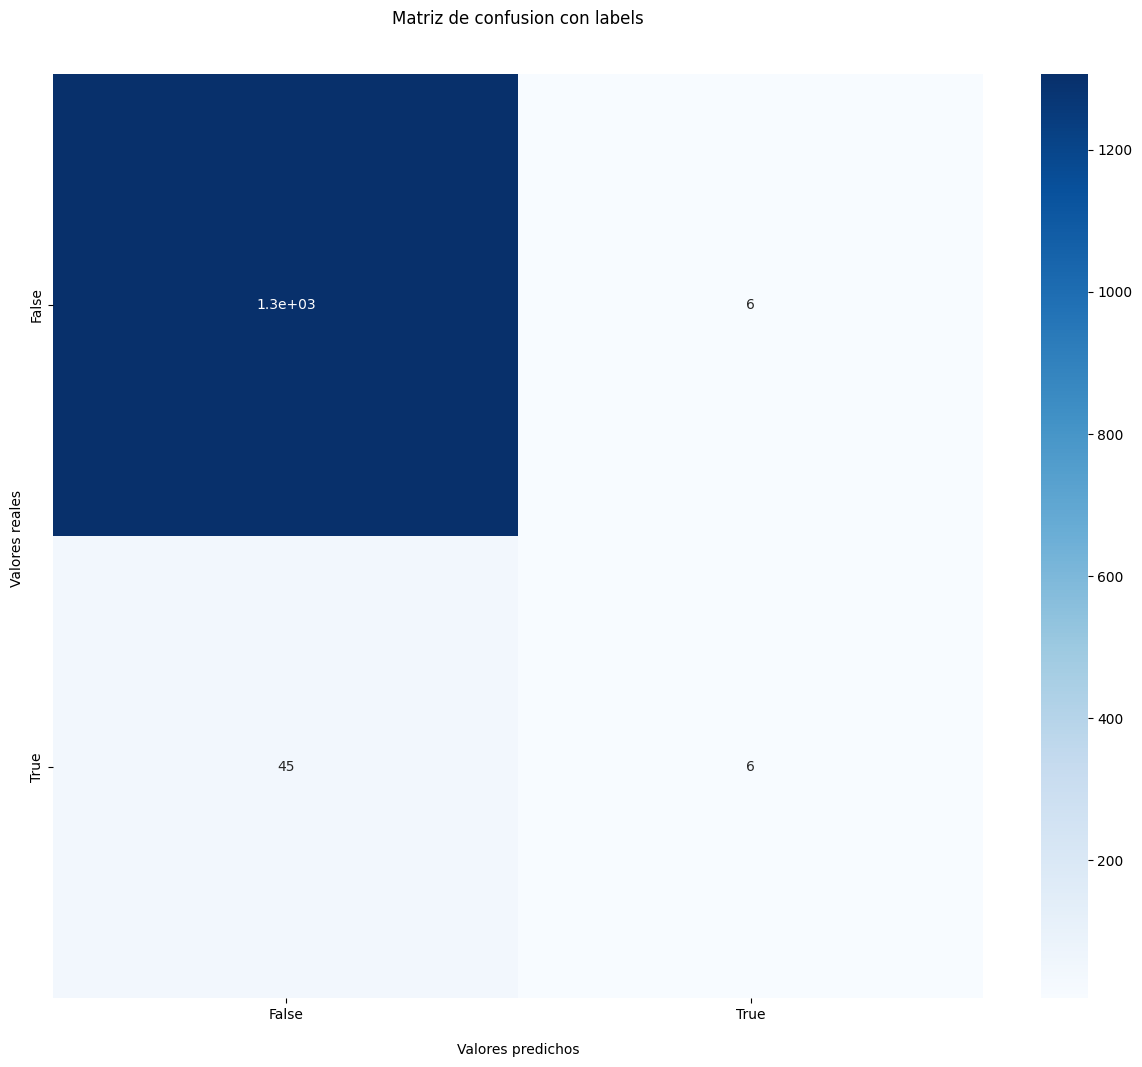

Matriz de Confusión:
[[1307    6]
 [  45    6]]


In [30]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Visualización de la matriz
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)